#preparations

In [1]:
import pandas as pd
import glob
import datetime
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#some needed dictionaries:
ID_dict = {'Csi':('carob','Ceratonia siliqua','cera'),'Ph':('pine', 'Pinus halepensis', 'pine'), 'Pl':('pistacia', 'Pistacia lentiscus', 'pist'), 'Qc':('oak', 'Quercus calliprinos', 'quer'), 'Cse':('cypress', 'Cupressus sempervirens', 'cyp')}
treatment_dict = {'1':'control', '2':'drought', '3':'control', '4':'control', '5':'drought', '6':'drought'}
color_dict = {'carob':'cyan', 'cypress':'red', 'pine':'purple', 'pistacia':'orange', 'oak':'blue'}

#process the file

In [3]:
#import the LWP_table
LWP_table_path = '/content/drive/MyDrive/projects/Thesis/data/LWP/lwp_daytime_09_23.csv'
LWP_table = pd.read_csv(LWP_table_path)
LWP_table.dropna(how='all', inplace=True)

In [4]:
# if we want to choose the values in the '2nd_reading' to replace the values in the 'LWP_raw (bar)'

##LWP
LWP_table['LWP_raw (bar)'] = LWP_table['2nd_reading'].combine_first(LWP_table['LWP_raw (bar)'])

##StWP
# Convert '2nd_reading_StWP' column to numeric, converting non-numeric values to NaN
numeric_2nd_reading_StWP = pd.to_numeric(LWP_table['2nd_reading_StWP'], errors='coerce')
# Combine 'StWP_raw[bar]' column with the numeric values from '2nd_reading_StWP'
LWP_table['StWP_raw[bar]'] = LWP_table['StWP_raw[bar]'].combine_first(numeric_2nd_reading_StWP)

In [5]:
#add new columns for 'LWP(MPa)',StWP(MPa), 'plot', 'treatment', 'English_name'
LWP_table['LWP(MPa)'] = LWP_table['LWP_raw (bar)']*(-0.1)
LWP_table['StWP(MPa)'] = LWP_table['StWP_raw[bar]']*(-0.1)
LWP_table['English_name'] = [ID_dict[ID[:-1]][0] for ID in LWP_table['Label']]
LWP_table['plot'] = [ID[-1] for ID in LWP_table['Label']]
LWP_table['treatment'] = [treatment_dict[plot] for plot in LWP_table['plot']]

#make the date in datetime format:
LWP_table['Date'] = pd.to_datetime(LWP_table['Date'],dayfirst=True)

#show the table:
LWP_table

,Date,Label,LWP_raw (bar),2nd_reading,cloudy,StWP_raw[bar],2nd_reading_StWP,LWP(MPa),StWP(MPa),English_name,plot,treatment
0,2021-10-25,Ph1,24.90,NaN,NaN,NaN,NaN,-2.490,NaN,pine,1,control
1,2021-10-25,Cse1,36.20,NaN,NaN,NaN,NaN,-3.620,NaN,cypress,1,control
2,2021-10-25,Qc1,43.60,NaN,NaN,NaN,NaN,-4.360,NaN,oak,1,control
3,2021-10-25,Csi1,12.60,NaN,NaN,NaN,NaN,-1.260,NaN,carob,1,control
4,2021-10-25,Pl1,40.00,40.0,NaN,NaN,NaN,-4.000,NaN,pistacia,1,control
...,...,...,...,...,...,...,...,...,...,...,...,...
745,2023-09-19,Ph6,25.02,NaN,NaN,NaN,NaN,-2.502,NaN,pine,6,drought
746,2023-09-19,Cse6,33.51,NaN,NaN,NaN,NaN,-3.351,NaN,cypress,6,drought
747,2023-09-19,Qc6,24.22,NaN,NaN,NaN,NaN,-2.422,NaN,oak,6,drought
748,2023-09-19,Csi6,24.32,NaN,NaN,NaN,NaN,-2.432,NaN,carob,6,drought


In [ ]:
#if we want to export the file:
LWP_table.to_csv('/content/drive/MyDrive/projects/Thesis/data/LWP/LWP_table_for_JMP.csv')

#Presenting

##show table

In [ ]:
#if we want to exclude data of 08/23 because it is predawn and is not representig:

LWP_table = LWP_table[LWP_table['Date'] != '2023-08-24']

LWP_table

,Date,Label,LWP_raw (bar),2nd_reading,cloudy,StWP_raw[bar],2nd_reading_StWP,LWP(MPa),StWP(MPa),English_name,plot,treatment
0,2021-10-25,Ph1,24.90,NaN,NaN,NaN,NaN,-2.490,NaN,pine,1,control
1,2021-10-25,Cse1,36.20,NaN,NaN,NaN,NaN,-3.620,NaN,cypress,1,control
2,2021-10-25,Qc1,43.60,NaN,NaN,NaN,NaN,-4.360,NaN,oak,1,control
3,2021-10-25,Csi1,12.60,NaN,NaN,NaN,NaN,-1.260,NaN,carob,1,control
4,2021-10-25,Pl1,40.00,40.0,NaN,NaN,NaN,-4.000,NaN,pistacia,1,control
...,...,...,...,...,...,...,...,...,...,...,...,...
745,2023-09-19,Ph6,25.02,NaN,NaN,NaN,NaN,-2.502,NaN,pine,6,drought
746,2023-09-19,Cse6,33.51,NaN,NaN,NaN,NaN,-3.351,NaN,cypress,6,drought
747,2023-09-19,Qc6,24.22,NaN,NaN,NaN,NaN,-2.422,NaN,oak,6,drought
748,2023-09-19,Csi6,24.32,NaN,NaN,NaN,NaN,-2.432,NaN,carob,6,drought


##LWP

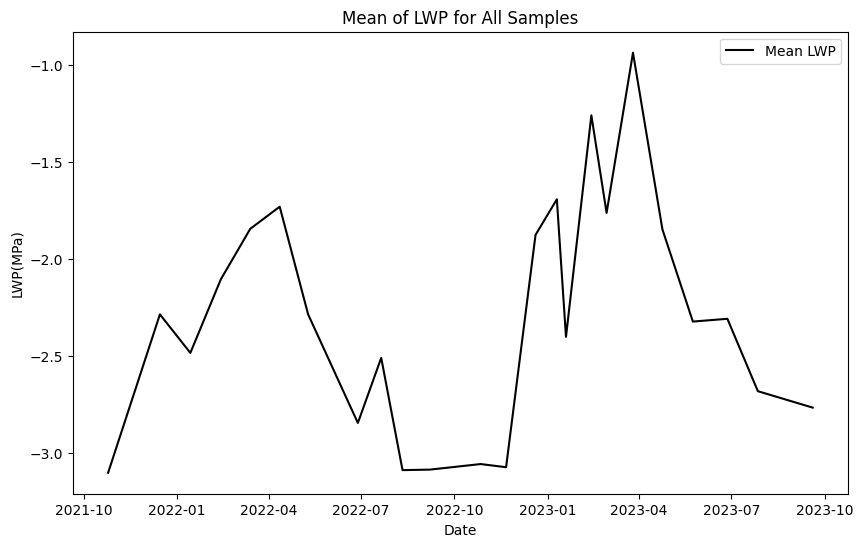

In [ ]:
# Plot 1: Mean of all samples
plt.figure(figsize=(10, 6))
mean_values = LWP_table.groupby('Date')['LWP(MPa)'].mean()
plt.plot(mean_values.index, mean_values.values, color='black', label='Mean LWP')
plt.xlabel('Date')
plt.ylabel('LWP(MPa)')
plt.title('Mean of LWP for All Samples')
plt.legend()
plt.show()



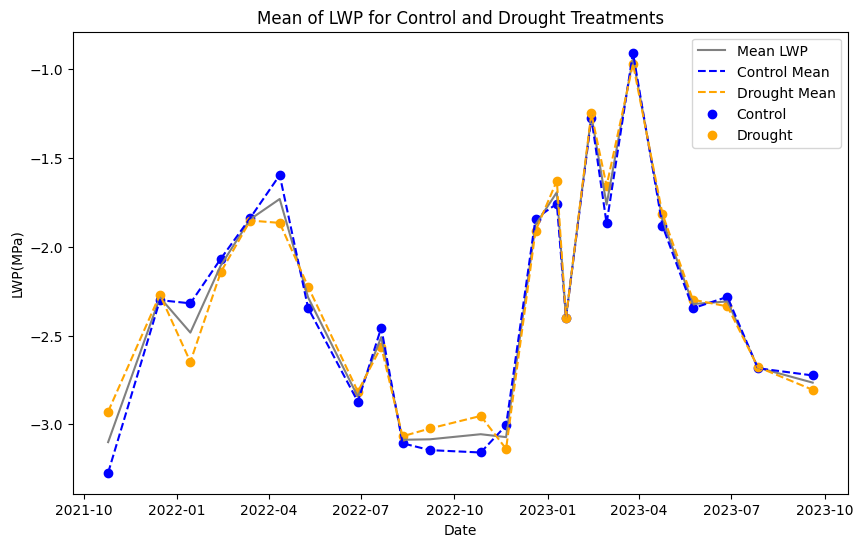

In [ ]:
# Plot 2: Mean of 'control' and 'drought' treatments
plt.figure(figsize=(10, 6))
control_mean = LWP_table[LWP_table['treatment'] == 'control'].groupby('Date')['LWP(MPa)'].mean()
drought_mean = LWP_table[LWP_table['treatment'] == 'drought'].groupby('Date')['LWP(MPa)'].mean()
plt.plot(mean_values.index, mean_values.values, color='gray', label='Mean LWP')
plt.plot(control_mean.index, control_mean.values, color='blue', linestyle='--', label='Control Mean')
plt.plot(drought_mean.index, drought_mean.values, color='orange', linestyle='--', label='Drought Mean')
plt.scatter(control_mean.index, control_mean.values, color='blue', label='Control', marker='o')
plt.scatter(drought_mean.index, drought_mean.values, color='orange', label='Drought', marker='o')
plt.xlabel('Date')
plt.ylabel('LWP(MPa)')
plt.title('Mean of LWP for Control and Drought Treatments')
plt.legend()
plt.show()

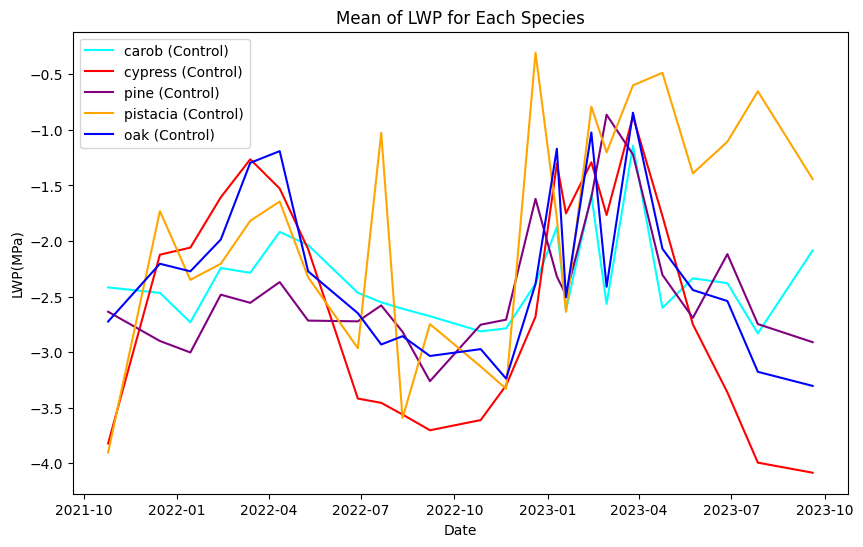

In [ ]:
# Plot 3: Mean of LWP for each species
plt.figure(figsize=(10, 6))

for species, color in color_dict.items():
    species_mean = LWP_table[(LWP_table['English_name'] == species) ].groupby('Date')['LWP(MPa)'].mean()

    plt.plot(species_mean.index, species_mean.values, color=color, linestyle='-', label=species + ' (Control)')

plt.xlabel('Date')
plt.ylabel('LWP(MPa)')
plt.title('Mean of LWP for Each Species')
plt.legend()
plt.show()

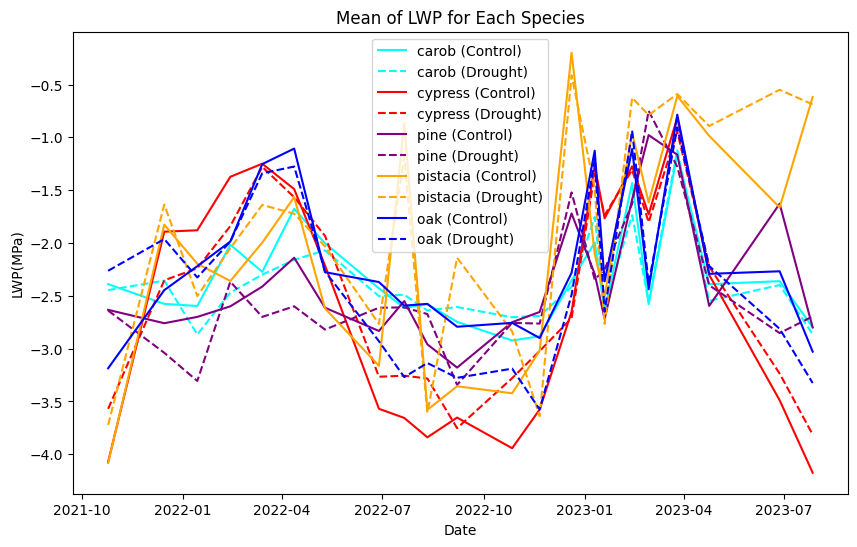

In [ ]:
# Plot 3: Mean of LWP for each species
plt.figure(figsize=(10, 6))

for species, color in color_dict.items():
    species_control_mean = LWP_table[(LWP_table['English_name'] == species) & (LWP_table['treatment'] == 'control')].groupby('Date')['LWP(MPa)'].mean()
    species_drought_mean = LWP_table[(LWP_table['English_name'] == species) & (LWP_table['treatment'] == 'drought')].groupby('Date')['LWP(MPa)'].mean()

    plt.plot(species_control_mean.index, species_control_mean.values, color=color, linestyle='-', label=species + ' (Control)')
    plt.plot(species_drought_mean.index, species_drought_mean.values, color=color, linestyle='--', label=species + ' (Drought)')

plt.xlabel('Date')
plt.ylabel('LWP(MPa)')
plt.title('Mean of LWP for Each Species')
plt.legend()
plt.show()

## StWP

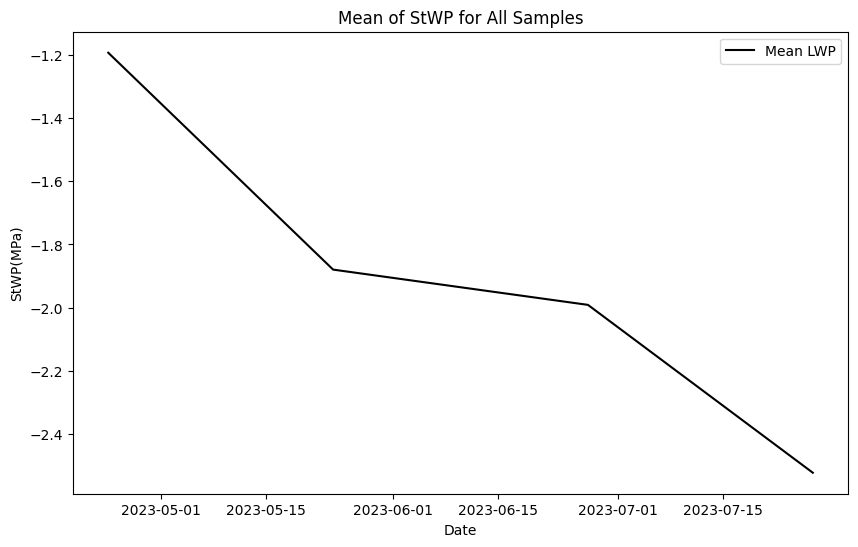

In [ ]:
# Plot 1: Mean of all samples
plt.figure(figsize=(10, 6))
mean_values = LWP_table.groupby('Date')['StWP(MPa)'].mean()
plt.plot(mean_values.index, mean_values.values, color='black', label='Mean LWP')
plt.xlabel('Date')
plt.ylabel('StWP(MPa)')
plt.title('Mean of StWP for All Samples')
plt.legend()
plt.show()


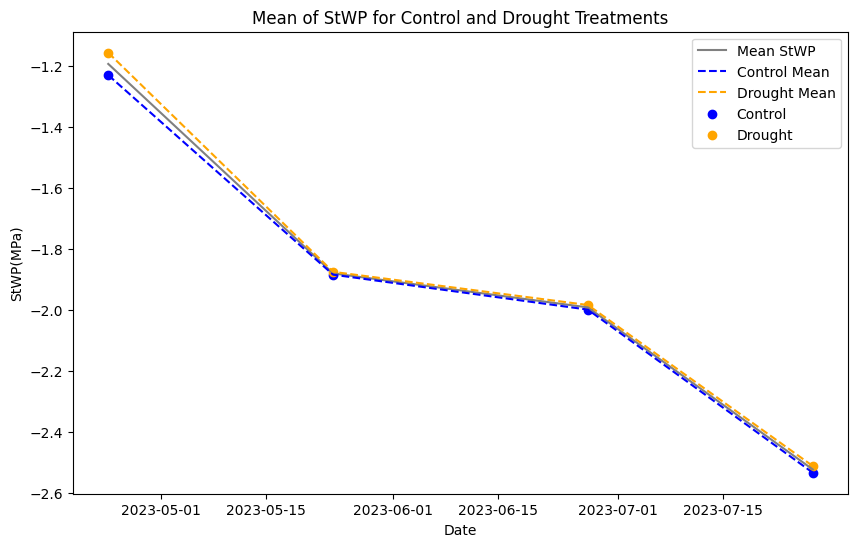

In [ ]:
# Plot 2: Mean of 'control' and 'drought' treatments
plt.figure(figsize=(10, 6))
control_mean = LWP_table[LWP_table['treatment'] == 'control'].groupby('Date')['StWP(MPa)'].mean()
drought_mean = LWP_table[LWP_table['treatment'] == 'drought'].groupby('Date')['StWP(MPa)'].mean()
plt.plot(mean_values.index, mean_values.values, color='gray', label='Mean StWP')
plt.plot(control_mean.index, control_mean.values, color='blue', linestyle='--', label='Control Mean')
plt.plot(drought_mean.index, drought_mean.values, color='orange', linestyle='--', label='Drought Mean')
plt.scatter(control_mean.index, control_mean.values, color='blue', label='Control', marker='o')
plt.scatter(drought_mean.index, drought_mean.values, color='orange', label='Drought', marker='o')
plt.xlabel('Date')
plt.ylabel('StWP(MPa)')
plt.title('Mean of StWP for Control and Drought Treatments')
plt.legend()
plt.show()

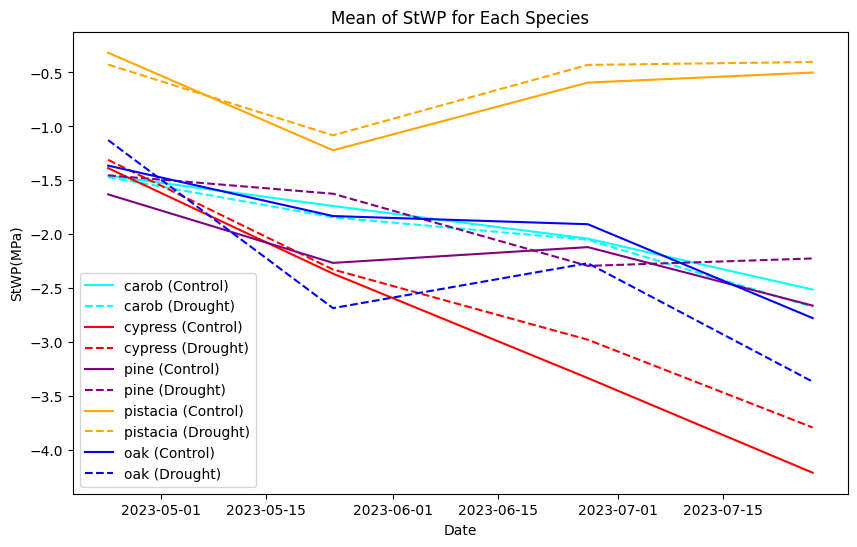

In [ ]:
# Plot 3: Mean of LWP for each species
plt.figure(figsize=(10, 6))

for species, color in color_dict.items():
    species_control_mean = LWP_table[(LWP_table['English_name'] == species) & (LWP_table['treatment'] == 'control')].groupby('Date')['StWP(MPa)'].mean()
    species_drought_mean = LWP_table[(LWP_table['English_name'] == species) & (LWP_table['treatment'] == 'drought')].groupby('Date')['StWP(MPa)'].mean()

    plt.plot(species_control_mean.index, species_control_mean.values, color=color, linestyle='-', label=species + ' (Control)')
    plt.plot(species_drought_mean.index, species_drought_mean.values, color=color, linestyle='--', label=species + ' (Drought)')

plt.xlabel('Date')
plt.ylabel('StWP(MPa)')
plt.title('Mean of StWP for Each Species')
plt.legend()
plt.show()

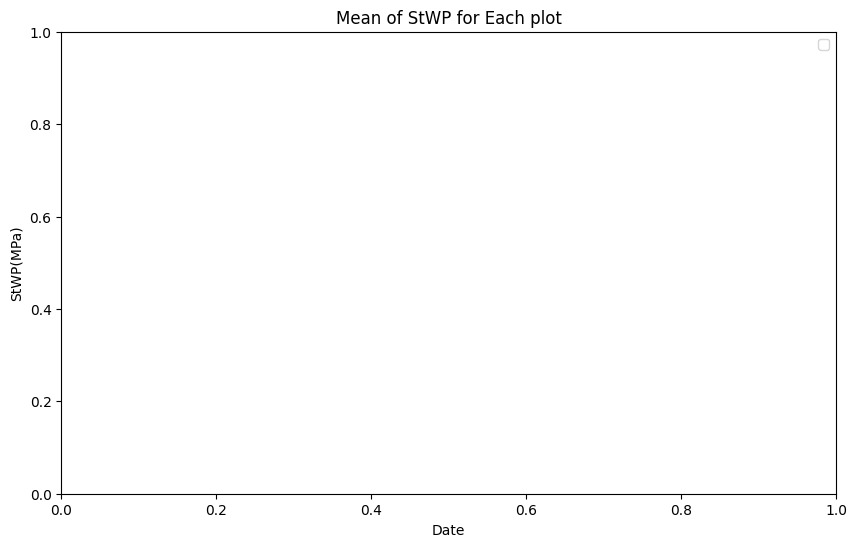

In [ ]:
# Plot 4: Mean of LWP for each plot
plt.figure(figsize=(10, 6))
for plot_num in range(1,7):
  plot_mean = LWP_table[LWP_table['plot'] == str(plot_num)].groupby('Date')['StWP(MPa)'].mean()

plt.xlabel('Date')
plt.ylabel('StWP(MPa)')
plt.title('Mean of StWP for Each plot')
plt.legend()
plt.show()

## 08/23 data - predawn

In [ ]:
Aug_23_data = LWP_table[LWP_table['Date'] == '2023-08-24']
Aug_23_data = Aug_23_data[['Date','LWP(MPa)', 'StWP(MPa)',
      'English_name', 'plot', 'treatment']]

#Aug_23_data.to_csv('/content/Aug_23_data')

<ipython-input-36-95346f15a611>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='treatment', y='LWP(MPa)', data=Aug_23_data, estimator=np.mean, ci=None)


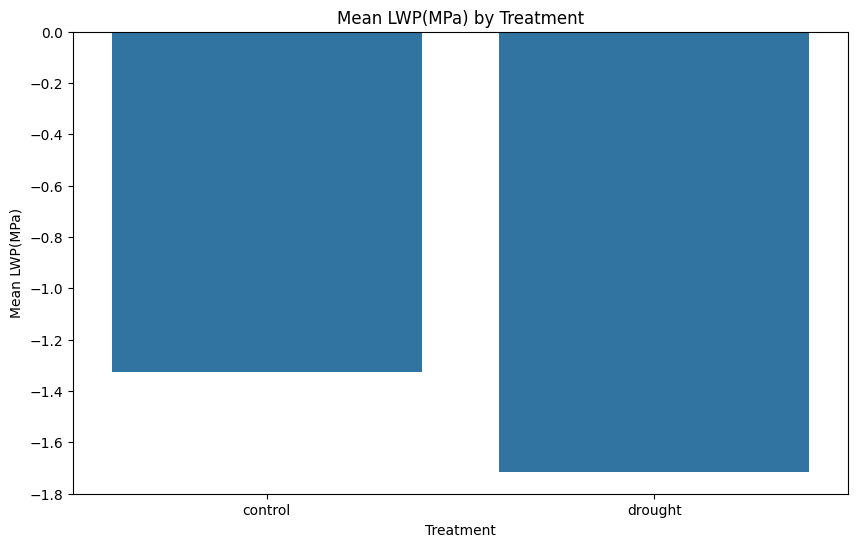

In [ ]:
# 1. Bar plot showing the mean of different treatments
plt.figure(figsize=(10, 6))
sns.barplot(x='treatment', y='LWP(MPa)', data=Aug_23_data, estimator=np.mean, ci=None)
plt.title('Mean LWP(MPa) by Treatment')
plt.xlabel('Treatment')
plt.ylabel('Mean LWP(MPa)')
plt.show()

<ipython-input-37-403ac437a420>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='treatment', y='LWP(MPa)', hue='English_name', data=Aug_23_data, estimator=np.mean, ci=None)


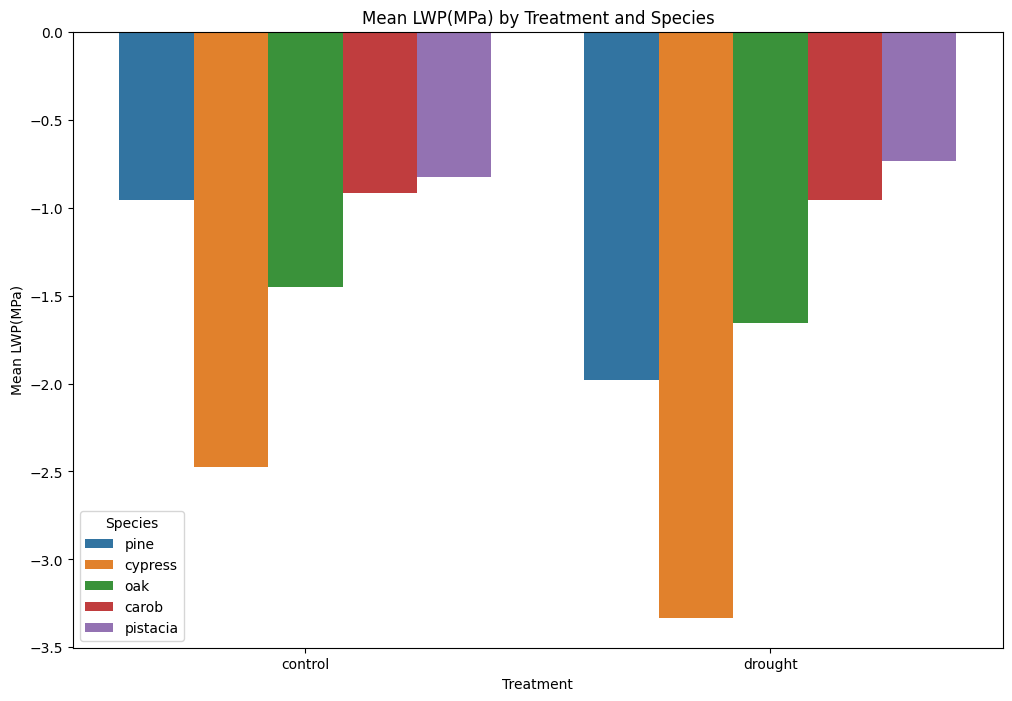

In [ ]:
# 2. Bar plot showing the mean of different treatments by species
plt.figure(figsize=(12, 8))
sns.barplot(x='treatment', y='LWP(MPa)', hue='English_name', data=Aug_23_data, estimator=np.mean, ci=None)
plt.title('Mean LWP(MPa) by Treatment and Species')
plt.xlabel('Treatment')
plt.ylabel('Mean LWP(MPa)')
plt.legend(title='Species')
plt.show()

<ipython-input-41-400d8019020e>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='plot', y='LWP(MPa)', data=Aug_23_data, estimator=np.mean, ci=None)


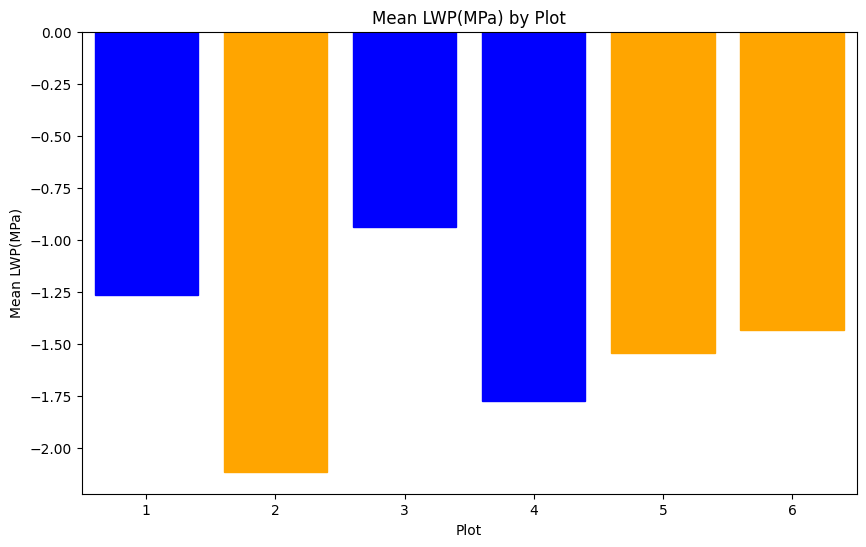

In [ ]:
# 3. Bar plot showing the mean of different plots with specific treatments colored orange
plt.figure(figsize=(10, 6))

# Create the bar plot
barplot = sns.barplot(x='plot', y='LWP(MPa)', data=Aug_23_data, estimator=np.mean, ci=None)

# Customize colors for specific treatments
for patch, plot in zip(barplot.patches, Aug_23_data['plot'].unique()):
    if plot in ['2', '5', '6']:
        patch.set_color('orange')
    else:
        patch.set_color('blue')

plt.title('Mean LWP(MPa) by Plot')
plt.xlabel('Plot')
plt.ylabel('Mean LWP(MPa)')
plt.show()

## LWP FOR MY AMIRIM PERIOD

In [ ]:
#take just part of the samples
LWP_year = LWP_table[(LWP_table['Date'] >= '2022-03-01') & (LWP_table['Date'] <= '2023-02-28')]
LWP_year

,Date,Label,LWP_raw (bar),2nd_reading,cloudy,StWP_raw[bar],Unnamed: 6,LWP(MPa),English_name,plot,treatment
120,2022-03-14,Ph1,23.00,NaN,NaN,NaN,NaN,-2.300,pine,1,control
121,2022-03-14,Cse1,11.30,NaN,NaN,NaN,NaN,-1.130,cypress,1,control
122,2022-03-14,Qc1,12.80,NaN,NaN,NaN,NaN,-1.280,oak,1,control
123,2022-03-14,Csi1,21.30,NaN,NaN,NaN,NaN,-2.130,carob,1,control
124,2022-03-14,Pl1,15.40,NaN,NaN,NaN,NaN,-1.540,pistacia,1,control
...,...,...,...,...,...,...,...,...,...,...,...
535,2023-02-28,Ph6,4.37,NaN,NaN,NaN,NaN,-0.437,pine,6,drought
536,2023-02-28,Cse6,17.47,NaN,NaN,NaN,NaN,-1.747,cypress,6,drought
537,2023-02-28,Qc6,32.47,NaN,NaN,NaN,NaN,-3.247,oak,6,drought
538,2023-02-28,Csi6,26.30,NaN,NaN,NaN,NaN,-2.630,carob,6,drought


NameError: name 'LWP_year' is not defined

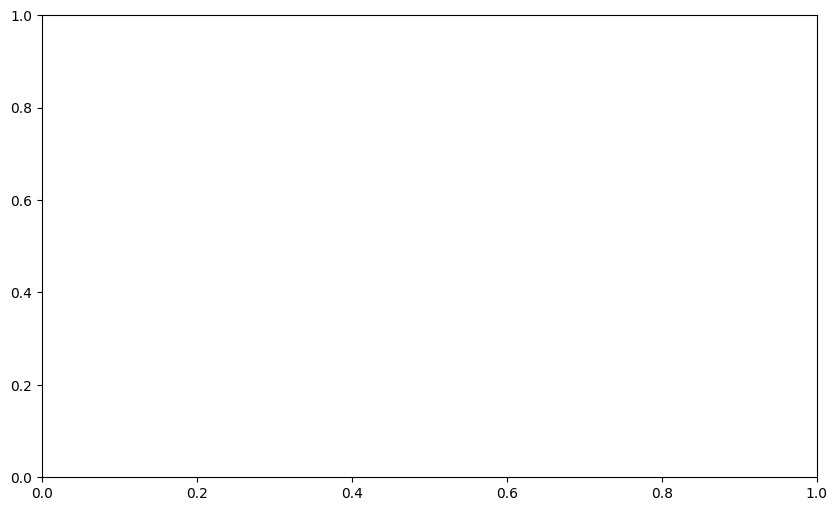

In [ ]:

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Get unique species names
species_names = LWP_year['English_name'].unique()

# Iterate over each species
for i, species in enumerate(species_names):
    # Filter the DataFrame for the current species and both treatments
    species_df = LWP_year[(LWP_year['English_name'] == species) & LWP_year['treatment'].isin(['control', 'drought'])]

    # Group the filtered DataFrame by date and treatment
    grouped = species_df.groupby(['Date', 'treatment'])

    # Calculate the mean LWP for each date and treatment
    means = grouped['LWP(MPa)'].mean().unstack()

    # Get the unique dates
    dates = means.index

    # Calculate the x positions for the bars (offset for each species)
    x = np.arange(len(dates)) + i*0.15

    # Calculate the difference between control and drought treatments
    diff = means['control'] - means['drought']

    # Plot the bars for the differences
    ax.bar(x, diff, width=0.15, color=color_dict[species], label = species)

# Set the x-axis tick positions and labels
ax.set_xticks(np.arange(len(dates)))
ax.set_xticklabels([date.strftime('%Y-%m-%d') for date in dates], rotation=45, fontsize = 16)

# Set the y-axis label
ax.set_ylabel('Difference in LWP (MPa)\n<---drought | control--->', fontsize = 16)

ax.axhline(0, color='black', linestyle='--')


# Set the x-axis to start from 0
# ax.spines['left'].set_position(0.05)
plt.legend(fontsize = 16)
# Adjust the spacing between bars and set the limit on y-axis
ax.margins(x=0.05)

# Show the plot
plt.show()


# make table and statistics

In [ ]:
LWP_table

,Date,Label,LWP_raw (bar),2nd_reading,cloudy,StWP_raw[bar],2nd_reading_StWP,LWP(MPa),StWP(MPa),English_name,plot,treatment
0,2021-10-25,Ph1,24.90,NaN,NaN,NaN,NaN,-2.490,NaN,pine,1,control
1,2021-10-25,Cse1,36.20,NaN,NaN,NaN,NaN,-3.620,NaN,cypress,1,control
2,2021-10-25,Qc1,43.60,NaN,NaN,NaN,NaN,-4.360,NaN,oak,1,control
3,2021-10-25,Csi1,12.60,NaN,NaN,NaN,NaN,-1.260,NaN,carob,1,control
4,2021-10-25,Pl1,40.00,40.0,NaN,NaN,NaN,-4.000,NaN,pistacia,1,control
...,...,...,...,...,...,...,...,...,...,...,...,...
745,2023-09-19,Ph6,25.02,NaN,NaN,NaN,NaN,-2.502,NaN,pine,6,drought
746,2023-09-19,Cse6,33.51,NaN,NaN,NaN,NaN,-3.351,NaN,cypress,6,drought
747,2023-09-19,Qc6,24.22,NaN,NaN,NaN,NaN,-2.422,NaN,oak,6,drought
748,2023-09-19,Csi6,24.32,NaN,NaN,NaN,NaN,-2.432,NaN,carob,6,drought


In [ ]:
# prompt: please clean from the LWP_table all the dates after march 2023, and let me add more dates to clean from the table. then calculate the mean, standard deviation, median, max, min, and the mean of the max and mean values, of the LWP(MPa) values. I want a table with columns for the mentioned values, and with row for all the data together, and rows for each species apart (by the "English_name" column)

# Get additional dates to remove from user input
dates_to_remove_str = input("Enter dates to remove (YYYY-MM-DD, comma-separated): ")
dates_to_remove = [datetime.datetime.strptime(date.strip(), '%d-%m-%Y') for date in dates_to_remove_str.split(',')]

# Filter the DataFrame to exclude dates after March 2023 and user-specified dates
LWP_table_filtered = LWP_table[(LWP_table['Date'] <= '2023-03-01') & ~(LWP_table['Date'].isin(dates_to_remove))]

# Calculate statistics for all data
all_data_stats = LWP_table_filtered['LWP(MPa)'].agg(['mean', 'std', 'median', 'max', 'min'])
mean_of_max_min_all = (all_data_stats['max'] + all_data_stats['min']) / 2

# Calculate statistics for each species
species_stats = LWP_table_filtered.groupby('English_name')['LWP(MPa)'].agg(['mean', 'std', 'median', 'max', 'min'])
species_stats['mean_of_max_min'] = (species_stats['max'] + species_stats['min']) / 2

# Create a summary table
summary_table = pd.DataFrame({
    'Statistic': ['Mean', 'Std Dev', 'Median', 'Max', 'Min', 'Mean of Max and Min'],
    'All Data': [all_data_stats['mean'], all_data_stats['std'], all_data_stats['median'],
                 all_data_stats['max'], all_data_stats['min'], mean_of_max_min_all]
})

# Add species statistics to the summary table
for species in species_stats.index:
    summary_table[species] = [species_stats.loc[species, 'mean'], species_stats.loc[species, 'std'],
                              species_stats.loc[species, 'median'], species_stats.loc[species, 'max'],
                              species_stats.loc[species, 'min'], species_stats.loc[species, 'mean_of_max_min']]

# Display the summary table
print(summary_table)


Enter dates to remove (YYYY-MM-DD, comma-separated): 19-01-2023, 28-02-2023
             Statistic  All Data     carob   cypress       oak      pine  \
0                 Mean -2.395006 -2.365750 -2.550510 -2.263531 -2.566198   
1              Std Dev  0.856533  0.481663  1.029457  0.842050  0.520258   
2               Median -2.490000 -2.475000 -2.500000 -2.370000 -2.605000   
3                  Max -0.116000 -0.583000 -1.010000 -0.835000 -0.933000   
4                  Min -4.820000 -3.290000 -4.760000 -4.520000 -3.870000   
5  Mean of Max and Min -2.468000 -1.936500 -2.885000 -2.677500 -2.401500   

   pistacia  
0 -2.229042  
1  1.152138  
2 -2.150000  
3 -0.116000  
4 -4.820000  
5 -2.468000  


In [ ]:
summary_table

,Statistic,All Data,carob,cypress,oak,pine,pistacia
0,Mean,-2.395006,-2.365750,-2.550510,-2.263531,-2.566198,-2.229042
1,Std Dev,0.856533,0.481663,1.029457,0.842050,0.520258,1.152138
2,Median,-2.490000,-2.475000,-2.500000,-2.370000,-2.605000,-2.150000
3,Max,-0.116000,-0.583000,-1.010000,-0.835000,-0.933000,-0.116000
4,Min,-4.820000,-3.290000,-4.760000,-4.520000,-3.870000,-4.820000
5,Mean of Max and Min,-2.468000,-1.936500,-2.885000,-2.677500,-2.401500,-2.468000


# compare different plots

In [14]:
# Define custom colors for each plot
plot_colors = {
    '1': 'cyan',
    '2': 'red',
    '3': 'green',
    '4': 'purple',
    '5': 'orange',
    '6': 'brown'
}

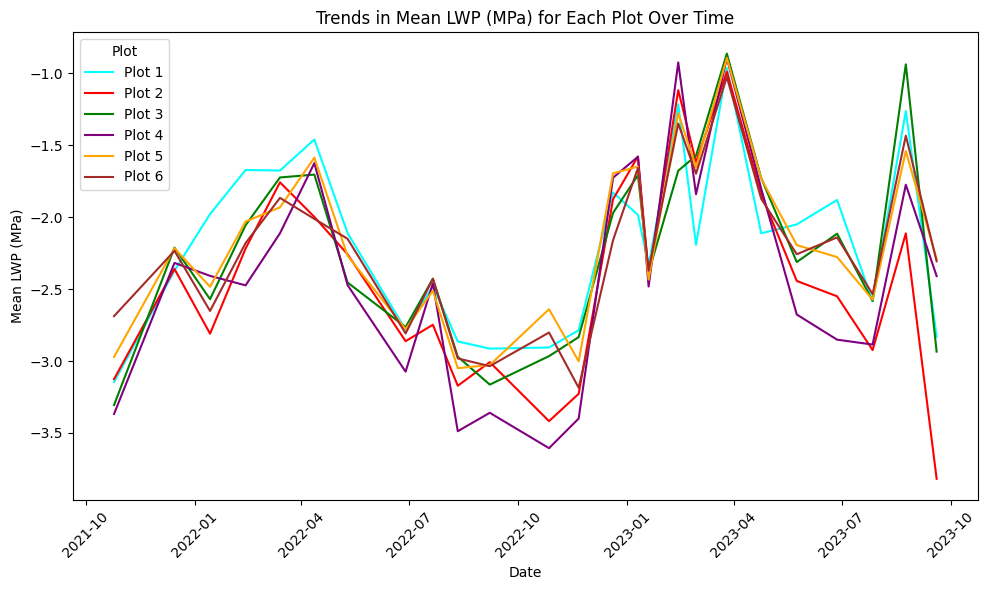

In [15]:


# Group by 'Date' and 'plot', then calculate the mean for the 'LWP(MPa)' column
mean_values = LWP_table.groupby(['Date', 'plot'])['LWP(MPa)'].mean().reset_index()

# Plotting the trends
plt.figure(figsize=(10, 6))

# Loop over each plot to plot them separately with specified colors
for plot in mean_values['plot'].unique():
    plot_data = mean_values[mean_values['plot'] == plot]
    plt.plot(plot_data['Date'], plot_data['LWP(MPa)'], label=f'Plot {plot}', color=plot_colors[str(plot)])

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Mean LWP (MPa)')
plt.title('Trends in Mean LWP (MPa) for Each Plot Over Time')
plt.legend(title='Plot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

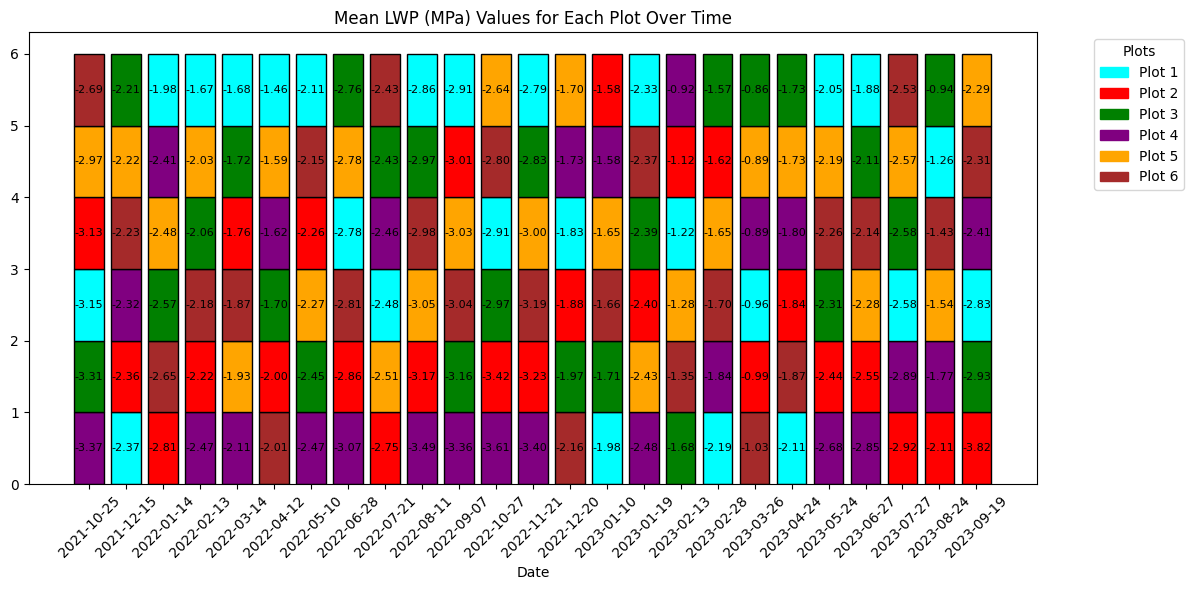

In [16]:
# Set up the figure
plt.figure(figsize=(12, 6))

# Loop over each date
for i, date in enumerate(mean_values['Date'].unique()):
    # Filter data for the specific date and sort by 'LWP(MPa)' values in descending order
    date_data = mean_values[mean_values['Date'] == date].sort_values(by='LWP(MPa)', ascending=True)

    # Plot each rectangle for the date
    for j, (plot, value) in enumerate(zip(date_data['plot'], date_data['LWP(MPa)'])):
        plt.bar(i, 1, bottom=j, color=plot_colors[str(plot)], edgecolor="black")  # Use specified color for each plot
        plt.text(i, j + 0.5, f"{value:.2f}", ha='center', va='center', color='black', fontsize=8)  # Display mean value

# Customize the plot
plt.xticks(range(len(mean_values['Date'].unique())), mean_values['Date'].dt.strftime('%Y-%m-%d').unique(), rotation=45)
plt.xlabel("Date")
plt.title("Mean LWP (MPa) Values for Each Plot Over Time")

# Add legend
legend_labels = [plt.Rectangle((0,0),1,1, color=plot_colors[plot]) for plot in plot_colors.keys()]
plt.legend(legend_labels, [f'Plot {plot}' for plot in plot_colors.keys()], title="Plots", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()